In [16]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pickle

In [17]:
BASE_DIR = os.path.curdir
DATASETS_DIR = os.path.join(BASE_DIR, 'datasets')
DATA_FILE = os.path.join(DATASETS_DIR, 'data.csv')

# Load the first 2000 rows of the dataset (assuming it's in a CSV file)
df = pd.read_csv(DATA_FILE, nrows=2000)

In [18]:
df.head()

,2023-01-09,Product Name,Product ID,Sales,Buying Price,Quantity
0,2023-01-09,JSB T2 DECORDER,404,200,160,1
1,2023-01-09,NUNIX DISH RACK DR2S,307,300,240,2
2,2023-01-09,NUNIX DISH RACK DR3S,310,400,320,1
3,2023-01-09,DIGITAL SCALE-FLAT,107,500,400,4
4,2023-01-09,AILYONS IRON BOX-HD198A,93,600,480,15


In [19]:
df.describe()

,Product ID,Sales,Buying Price,Quantity
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,246.155500,550.000000,440.000000,5.325500
std,142.841882,229.186088,183.348871,5.121197
min,4.000000,200.000000,160.000000,1.000000
25%,93.000000,375.000000,300.000000,1.000000
50%,252.000000,550.000000,440.000000,2.000000
75%,381.000000,725.000000,580.000000,9.000000
max,461.000000,900.000000,720.000000,15.000000


### Features and target variable

In [20]:
X = df[['Product ID', 'Sales', 'Buying Price', 'Quantity']]

### Adjusted threshold: Restock if Quantity is less than 0 OR Sales are greater than 800

In [21]:
df['Restock'] = ((df['Quantity'] < 0) | (df['Sales'] > 800)).astype(int)

In [22]:
df.head()

,2023-01-09,Product Name,Product ID,Sales,Buying Price,Quantity,Restock
0,2023-01-09,JSB T2 DECORDER,404,200,160,1,0
1,2023-01-09,NUNIX DISH RACK DR2S,307,300,240,2,0
2,2023-01-09,NUNIX DISH RACK DR3S,310,400,320,1,0
3,2023-01-09,DIGITAL SCALE-FLAT,107,500,400,4,0
4,2023-01-09,AILYONS IRON BOX-HD198A,93,600,480,15,0


In [23]:
df.describe()

,Product ID,Sales,Buying Price,Quantity,Restock
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,246.155500,550.000000,440.000000,5.325500,0.125000
std,142.841882,229.186088,183.348871,5.121197,0.330802
min,4.000000,200.000000,160.000000,1.000000,0.000000
25%,93.000000,375.000000,300.000000,1.000000,0.000000
50%,252.000000,550.000000,440.000000,2.000000,0.000000
75%,381.000000,725.000000,580.000000,9.000000,0.000000
max,461.000000,900.000000,720.000000,15.000000,1.000000


### Split the data into training and testing sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Restock'], test_size=0.2, random_state=42)

### Create a decision tree model

In [25]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

### Save the model

In [26]:
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

### Make predictions on the test set

In [27]:
predictions = model.predict(X_test)

### Display the 'Product Name', 'Prediction', and 'Actual Restock' columns

In [28]:
result_df = pd.DataFrame({'Product Name': df.loc[X_test.index, 'Product Name'], 'Prediction': predictions, 'Actual Restock': y_test})
print(result_df)

                 Product Name  Prediction  Actual Restock
1860              AIYONS 1801           0               0
353   AILYONS IRON BOX-HD198A           0               0
1333          VIEGAPRO SGGMB1           0               0
905    AILYONS KETTLE FK-0306           0               0
1289         VITRON HTC 3200S           0               0
...                       ...         ...             ...
965        SAYONA IRONBOX 407           0               0
1284             NUNIX 8803 5           0               0
1739    SAYONA BLOWDRY SY-300           0               0
261   AILYONS KETTLE FK- 0301           0               0
535    AILYONS KETTLE FK-0308           1               1

[400 rows x 3 columns]


### Display products that need restocking

In [29]:
restocking_df = result_df[result_df['Prediction'] == 1]
print("\nProducts that Need Restocking:")
print(restocking_df)


Products that Need Restocking:
                 Product Name  Prediction  Actual Restock
1927           AIYONS FK 0317           1               1
247                  NUNIX Q7           1               1
1847    SAYONA BLOWDRY SY-300           1               1
111              RASHNIK 1154           1               1
1487             VITRON -V636           1               1
383               VITRON 5568           1               1
1623     AILYONS BLENDER 1731           1               1
1647                 NUNIX 6S           1               1
239   AILYONS KETTLE FK- 0301           1               1
879              RASHNIK 1154           1               1
759               SAYONA 2084           1               1
1103  AILYONS KETTLE FK- 0301           1               1
1223               NUNIX DR3H           1               1
135           JSB T2 DECORDER           1               1
583      AILYONS MICROWAVE-SC           1               1
1959           LCD 7201 14-42           

### Display products that don't need restocking

In [30]:
no_restock_df = result_df[result_df['Prediction'] == 0]
print("\nProducts that Don't Need Restocking:")
print(no_restock_df)


Products that Don't Need Restocking:
                 Product Name  Prediction  Actual Restock
1860              AIYONS 1801           0               0
353   AILYONS IRON BOX-HD198A           0               0
1333          VIEGAPRO SGGMB1           0               0
905    AILYONS KETTLE FK-0306           0               0
1289         VITRON HTC 3200S           0               0
...                       ...         ...             ...
534   AILYONS KETTLE FK- 0301           0               0
965        SAYONA IRONBOX 407           0               0
1284             NUNIX 8803 5           0               0
1739    SAYONA BLOWDRY SY-300           0               0
261   AILYONS KETTLE FK- 0301           0               0

[347 rows x 3 columns]


### Evaluate the model

In [31]:
accuracy = accuracy_score(y_test, predictions)
print(f'\nAccuracy: {accuracy:.2f}')


Accuracy: 1.00


### Display classification report with zero_division='warn'

In [32]:
print("\nClassification Report:")
print(classification_report(y_test, predictions, zero_division='warn'))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       347
           1       1.00      1.00      1.00        53

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



### Display decision tree rules with more descriptive class names

In [33]:
tree_rules = export_text(model, feature_names=X.columns.tolist(), class_names=["Do Not Restock", "Need Restocking"])
print("\nDecision Tree Rules:")
print(tree_rules)


Decision Tree Rules:
|--- Buying Price <= 680.00
|   |--- class: Do Not Restock
|--- Buying Price >  680.00
|   |--- class: Need Restocking



### Visualize the decision tree and save it to a PNG file

[Text(0.5, 0.75, 'node #0\nBuying Price <= 680.0\nsamples = 1600\nvalue = [1403, 197]\nclass = Do Not Restock'),
 Text(0.25, 0.25, 'node #1\nsamples = 1403\nvalue = [1403, 0]\nclass = Do Not Restock'),
 Text(0.75, 0.25, 'node #2\nsamples = 197\nvalue = [0, 197]\nclass = Need Restocking')]

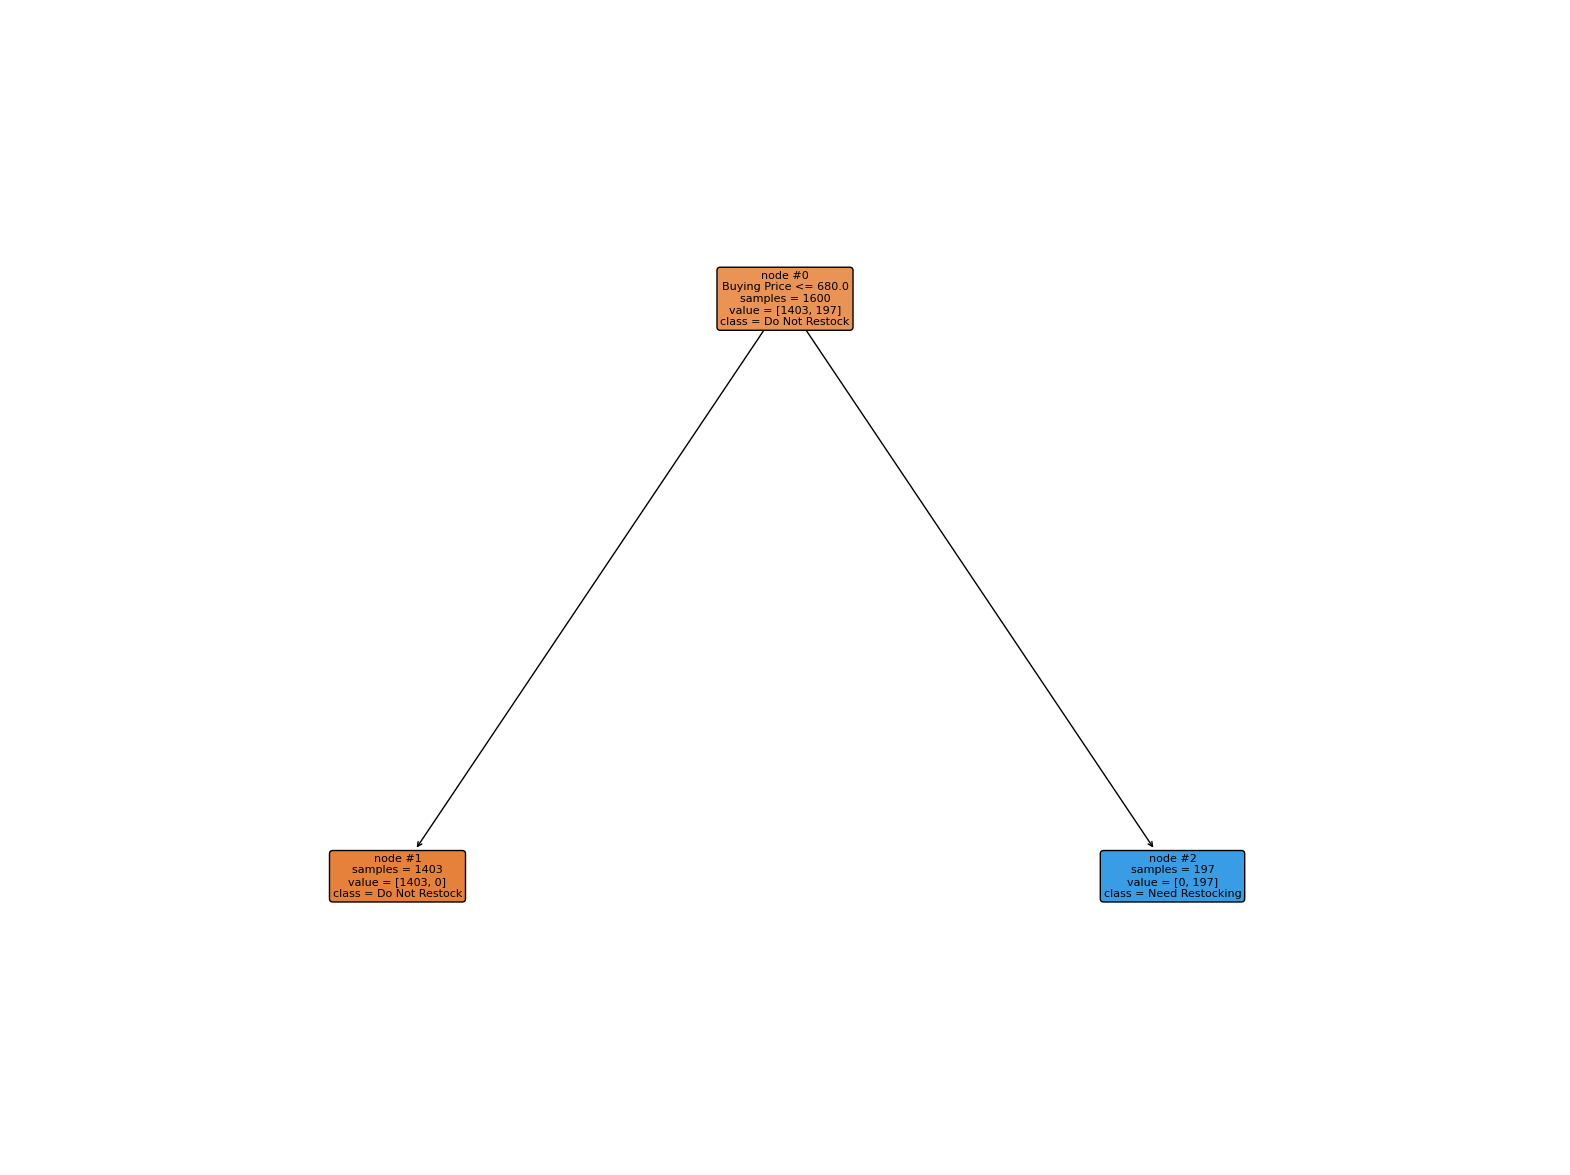

In [34]:
plt.figure(figsize=(20, 15))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["Do Not Restock", "Need Restocking"], rounded=True, precision=2, impurity=False, node_ids=True, fontsize=8)